In [3]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
dados_horarios_qar = pd.read_csv("https://hub.arcgis.com/api/v3/datasets/5b1bf5c3e5114564bbf9b7a372b85e17_2/downloads/data?format=csv&spatialRefId=31983", index_col=["estação","data"], parse_dates=["data"])
dados_horarios_qar.head()

objectid  codnum  chuva     pres  rs  \
estação data                                                              
BG      2012-01-01 03:30:00+00:00         1       2    0.2  1008.15 NaN   
        2012-01-01 04:30:00+00:00         2       2    0.4  1007.13 NaN   
        2012-01-01 05:30:00+00:00         3       2    0.0  1006.32 NaN   
        2012-01-01 06:30:00+00:00         4       2    0.2  1005.82 NaN   
        2012-01-01 07:30:00+00:00         5       2    0.4  1005.45 NaN   

                                    temp     ur  dir_vento  vel_vento   so2  \
estação data                                                                  
BG      2012-01-01 03:30:00+00:00  24.67  95.24        NaN        NaN   NaN   
        2012-01-01 04:30:00+00:00  24.72  94.13        NaN        NaN  0.40   
        2012-01-01 05:30:00+00:00  24.49  92.91        NaN        NaN  0.12   
        2012-01-01 06:30:00+00:00  24.54  92.59        NaN        NaN  0.00   
        2012-01-01 07:30:00+00:00  24.78  90.71        NaN        NaN  0.00   

                                   ...    co    no    nox     o3  pm10  pm2_5  \
estação data                       ...                                          
BG      2012-01-01 03:30:00+00:00  ...  0.42  2.18  17.36  28.06  81.0    NaN   
        2012-01-01 04:30:00+00:00  ...  0.35  1.63  11.12  32.81  61.0    NaN   
        2012-01-01 05:30:00+00:00  ...  0.27  1.73  10.47  31.61  26.0    NaN   
        2012-01-01 06:30:00+00:00  ...  0.21  1.18   6.68  37.39  20.0    NaN   
        2012-01-01 07:30:00+00:00  ...  0.16  0.95   9.35  33.45   7.0    NaN   

                                        lat        lon  x_utm_sirgas2000  \
estação data                                                               
BG      2012-01-01 03:30:00+00:00 -22.88791 -43.471074       656828.8045   
        2012-01-01 04:30:00+00:00 -22.88791 -43.471074       656828.8045   
        2012-01-01 05:30:00+00:00 -22.88791 -43.471074       656828.8045   
        2012-01-01 06:30:00+00:00 -22.88791 -43.471074       656828.8045   
        2012-01-01 07:30:00+00:00 -22.88791 -43.471074       656828.8045   

                                   y_utm_sirgas2000  
estação data                                         
BG      2012-01-01 03:30:00+00:00      7.468075e+06  
        2012-01-01 04:30:00+00:00      7.468075e+06  
        2012-01-01 05:30:00+00:00      7.468075e+06  
        2012-01-01 06:30:00+00:00      7.468075e+06  
        2012-01-01 07:30:00+00:00      7.468075e+06  

[5 rows x 24 columns]

In [5]:
dados_horarios_qar.reset_index().groupby("estação").data.agg(["min", "max", "size"])

,min,max,size
estação,,,
AV,2011-01-01 03:30:00+00:00,2020-10-29 12:30:00+00:00,82847
BG,2012-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,85374
CA,2011-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,92766
CG,2012-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,85647
IR,2012-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,86365
PG,2012-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,84061
SC,2011-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,95166
SP,2011-01-01 03:30:00+00:00,2022-01-01 02:30:00+00:00,94867


In [6]:
dados_horarios_qar.groupby(level="estação").agg({"pm10": "count", "pm2_5": "count", "o3": "count", "co": "count", "no2": "count", "so2": "count", "temp": "count", "objectid": "size"})

,pm10,pm2_5,o3,co,no2,so2,temp,objectid
estação,,,,,,,,
AV,80935,0,80748,80206,0,70916,69833,82847
BG,77456,0,80458,75084,76094,70163,69338,85374
CA,87154,0,87643,87396,0,35688,73581,92766
CG,80959,0,81326,75358,76481,75188,85030,85647
IR,82487,76830,79545,78138,79620,69272,76440,86365
PG,79987,0,77922,0,0,0,79621,84061
SC,88415,0,90559,88526,0,85632,87253,95166
SP,91889,0,87851,91610,57938,83782,91316,94867


In [7]:
dados_horarios_qar_ca = dados_horarios_qar[dados_horarios_qar.index.isin(["CA"], level="estação")].droplevel("estação")
dados_horarios_qar_ca.head()

,objectid,codnum,chuva,pres,rs,temp,ur,dir_vento,vel_vento,so2,...,co,no,nox,o3,pm10,pm2_5,lat,lon,x_utm_sirgas2000,y_utm_sirgas2000
data,,,,,,,,,,,,,,,,,,,,,
2011-01-01 03:30:00+00:00,103080,3,0.2,1009.33,1.57,21.81,84.50,250.67,0.34,NaN,...,0.17,NaN,NaN,17.89,10.0,NaN,-22.908344,-43.178152,686853.7075,7.465470e+06
2011-01-01 04:30:00+00:00,103081,3,0.0,1009.00,1.40,21.79,84.73,121.17,0.92,NaN,...,0.21,NaN,NaN,12.44,11.0,NaN,-22.908344,-43.178152,686853.7075,7.465470e+06
2011-01-01 05:30:00+00:00,103082,3,0.2,1008.17,1.37,21.44,85.70,85.67,1.30,NaN,...,0.17,NaN,NaN,18.97,38.0,NaN,-22.908344,-43.178152,686853.7075,7.465470e+06
2011-01-01 06:30:00+00:00,103083,3,0.0,1008.00,1.30,21.17,88.57,85.33,1.33,NaN,...,0.22,NaN,NaN,11.08,8.0,NaN,-22.908344,-43.178152,686853.7075,7.465470e+06
2011-01-01 07:30:00+00:00,103084,3,0.2,1008.00,1.32,21.25,89.28,73.00,0.82,NaN,...,0.22,NaN,NaN,11.28,10.0,NaN,-22.908344,-43.178152,686853.7075,7.465470e+06


<Axes: xlabel='data'>

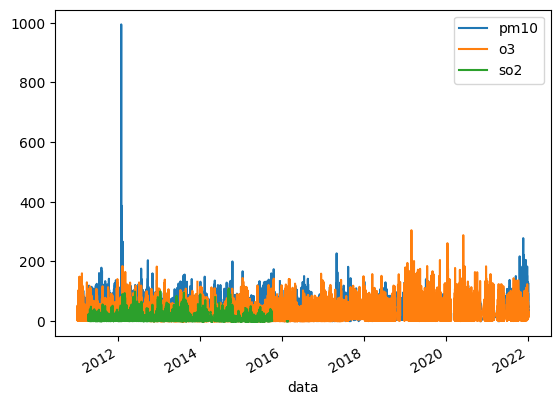

In [8]:
dados_horarios_qar_ca[["pm10", "o3", "so2"]].plot()

<Axes: xlabel='o3', ylabel='temp'>

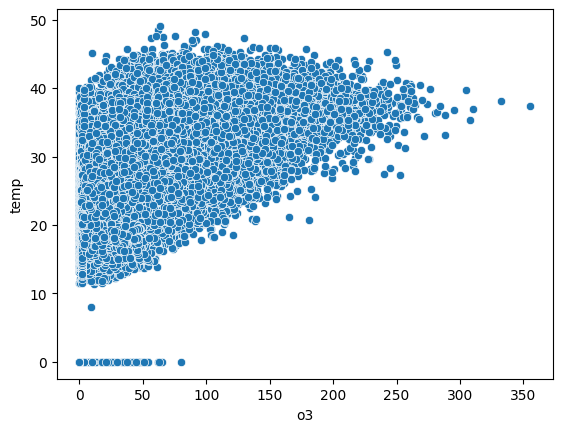

In [24]:
import seaborn as sns
sns.scatterplot(x="o3", y="temp", data=dados_horarios_qar[dados_horarios_qar["chuva"] == 0])